# Breast Cancer Diagnosis Modeling

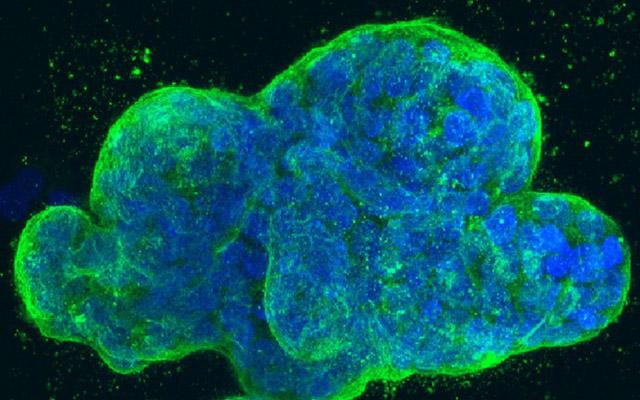

### Table of contents
* [1.0 Intorduction](#1.0)
* [2.0 Import and load](#2.0)
    * [2.1 Imports necessary modules](#2.1)
    * [2.2 Load data](#2.2)
    * [2.3 Data wrangling and exploration](#2.3)
* [3.0 Data wrangling and exploration](#3.0)
    * [3.1 Naming the features](#3.1)
    * [3.2 Visualizing the data](#3.2)
    * [3.3 Correlations](#3.3)
    * [3.4 Visualizing the target variable distribution](#3.4)
    * [3.5 Narrowing the feature variables](#3.5)
* [4.0 Modeling](#4.0)
    * [4.1 Hold-out function](#4.1)
    * [4.2 Single feature prediction comparison](#4.2)
    * [4.3 Hyperparameter tuning](#4.3)
        * [4.3.1 Logistic Regression](#4.3)
        * [4.3.2 Random Forest](#4.3)
    * [4.4 Testing the model](#4.4)
    * [4.5 Visualizing model predictions](#4.5)
    * [4.6 Convolutional neural network](#4.6)
* [5.0 Conclusions](#5.0)

### 1.0 Introduction: <a id='1.0'></a>

According to the American Cancer Society, the leading site of new cancer diagnoses for *all* Americans is the breast (31%). Breast cancer is, again, the most-diagnosed cancer in the country. Among females, new breast cancer cases account for more than double the cases of next leading cancer (lung).

The current portion of cancer deaths claimed by breast cancer is 15%, ranking as the second-leading cancer death cause among women, and third overall [1].

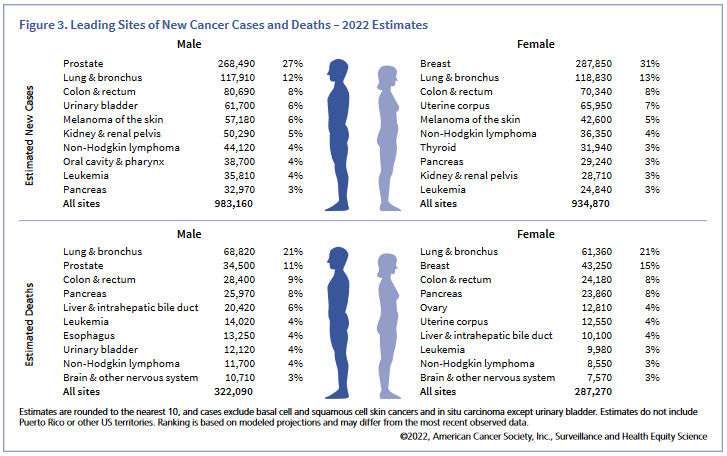

While treatments improve and overall death rate from breast cancer declines, the annual breast cancer case count has stagnated since 2003 [2].

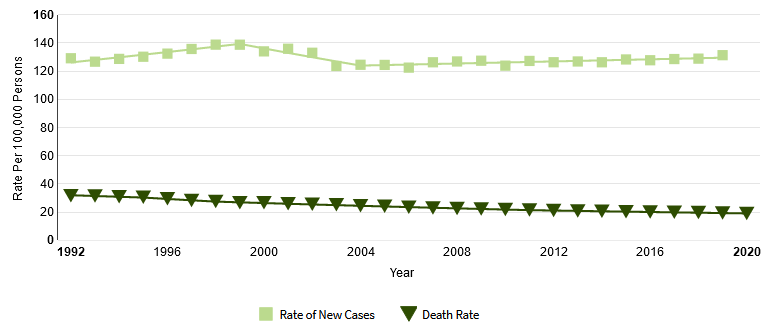

When considering age distribution of new cases, most are found in those aged over 50, peaking in the 70-74 age range. However, there are still over 100 cases per 100,000 in those aged under 40 [3].

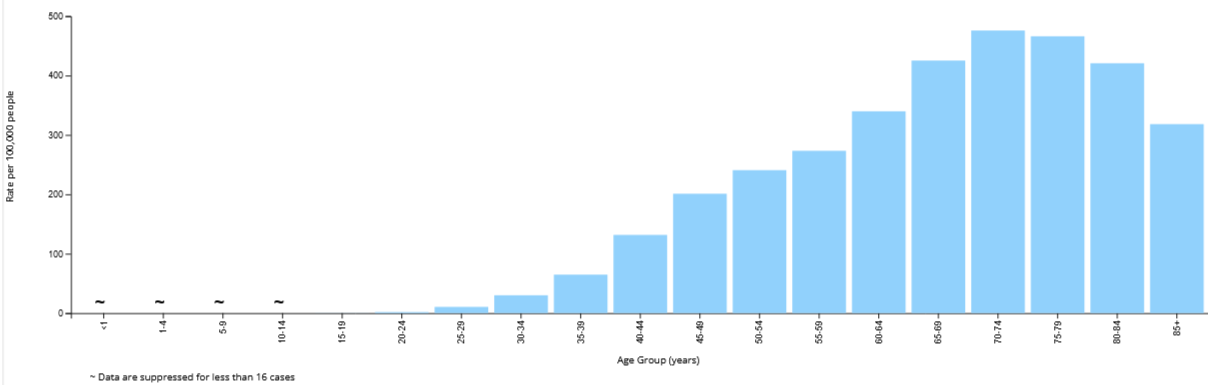

The CDC also categorizes the stage to which the breast cancer has progressed by the time a diagnosis is determined. Early detection is key for halting the cancer before it spreads. A timely detection in the Localized Stage will give the affected woman her best chances at remission and recovery [3].

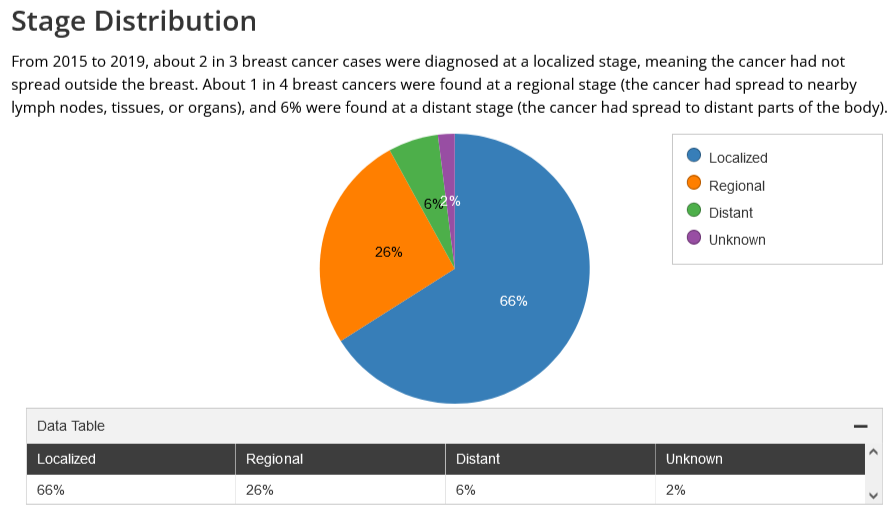

A major issue that people face with any medical diagnosis - especially cancers - is medical error. According to Johns Hopkins, diagnostic errors were the most common, most catastrophic, and most costly of medical mistakes. The leading medical error is cancer misdiagnosis (37.8%) [4].

Considering these factors, applying machine learning as a diagnostic aid could help doctors and patients. Using available breast cell tissue data, we can train a model to make timely and accurate diagnostic status predictions.

[1] https://www.cancer.org/content/dam/cancer-org/research/cancer-facts-and-statistics/annual-cancer-facts-and-figures/2022/2022-cancer-facts-and-figures.pdf

[2] https://seer.cancer.gov/statfacts/html/breast.html

[3] https://www.cdc.gov/cancer/breast/statistics/index.htm

[4] https://www.hopkinsmedicine.org/news/newsroom/news-releases/johns-hopkins-medicine-researchers-identify-health-conditions-likely-to-be-misdiagnosed

### 2.0 Import and load<a id='2.0'></a>

#### 2.1 Import necessary modules<a id='2.1'></a>

In [1]:
import os
import math 
import numpy as np
import pandas as pd
import scipy as sp

from datetime import datetime
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
#
# modeling
#
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

This interesting dataset from UCI Machine Learning repository is actually 3 similar datasets in one. They center around breast tumor identification and come from the University of Wisconsin, Clinical Sciences Center.

The focus of this particular project will be on just the first of the three files, which contains raw data from breast tissue exams. This is the data that will be used to predict whether tumors are benign or malignant.

#### 2.2 Load the data<a id='2.2'></a>

In [2]:
file1 = './wdbc-data.csv'

In [3]:
df1 = pd.read_csv(file1,header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The data came without column labels already assigned, but the accompanying documentation provided the proper names, which we will add soon.

### 3.0 Data wrangling and exploration<a id='3.0'></a>

In [4]:
df1.shape

(569, 32)

In [5]:
df1.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

We will check for missing values:

In [7]:
df1.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64

This data appears neat and orderly. The organization that provided the data pre-cleaned it to ensure no missing values.

Next we can check for repeat subjects (to prevent data leakage).

In [8]:
df1[0].nunique()

569

In [9]:
len(df1)

569

Great; number of subjects matches the length of our data, so every subject is indeed unique.

#### 3.1 Naming the features<a id='3.1'></a>

The original researchers collected the data in such a way that the 3 largest breast cell measurements of each feature are averaged together to create the observations contained in the final 10 columns of the data.

In [10]:
df1 = df1[[1,22,23,24,25,26,27,28,29,30,31]]
df1.head()

,1,22,23,24,25,26,27,28,29,30,31
0,M,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We can take this opportunity to give the columns their proper names.

In [11]:
df1.columns=['tumor','radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points','symmetry','fractal_dimension']
df1.head()

,tumor,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,M,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 3.2 Visualizing the data<a id='3.2'></a>

Now we can get an idea of the distribution of each of our features.

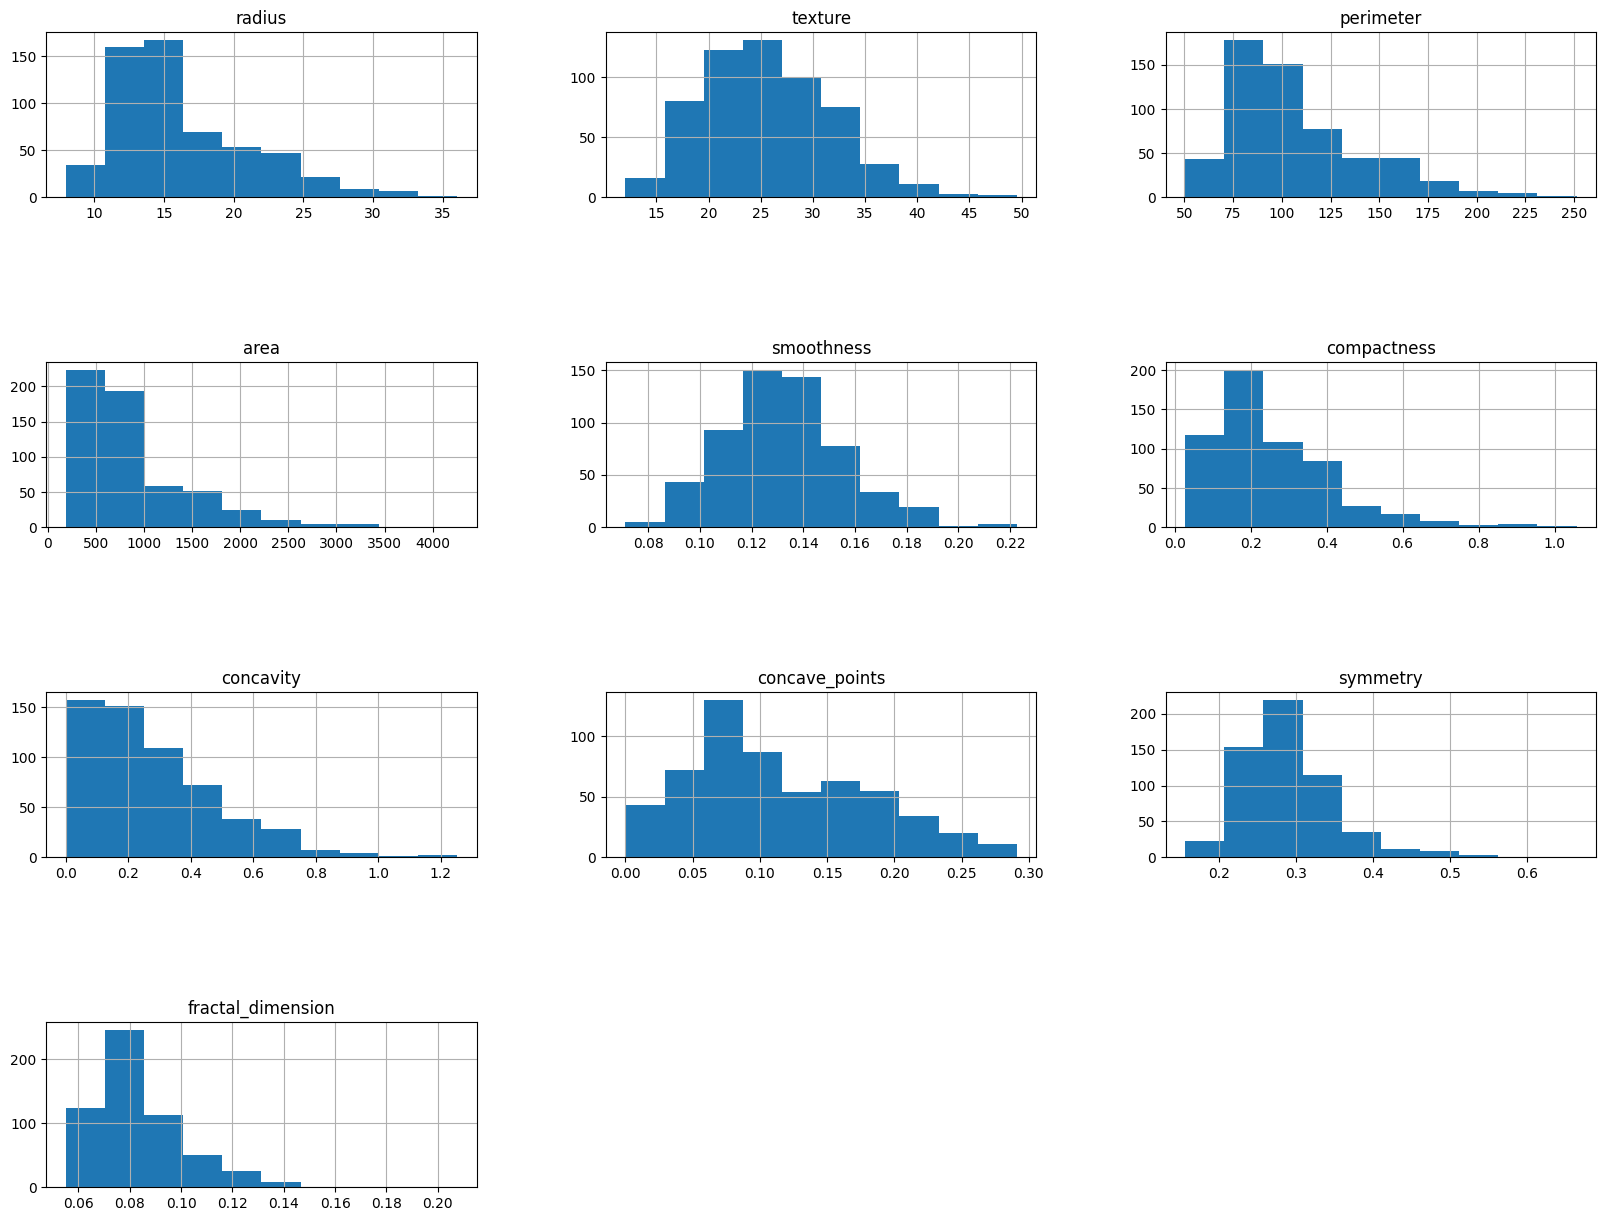

In [12]:
df1.hist(figsize=(20,15))
plt.subplots_adjust(hspace=1.0);

While most features appear to have left skew, there are no obvious "red flag" outliers.

We can also inspect boxplots for outliers, as well as how the data generally look. Due to scale differences among features, we will temporarily scale the data for visualization purposes. For now, this scaling will not be used beyond this graphic.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius'),
  Text(1, 0, 'texture'),
  Text(2, 0, 'perimeter'),
  Text(3, 0, 'area'),
  Text(4, 0, 'smoothness'),
  Text(5, 0, 'compactness'),
  Text(6, 0, 'concavity'),
  Text(7, 0, 'concave_points'),
  Text(8, 0, 'symmetry'),
  Text(9, 0, 'fractal_dimension')])

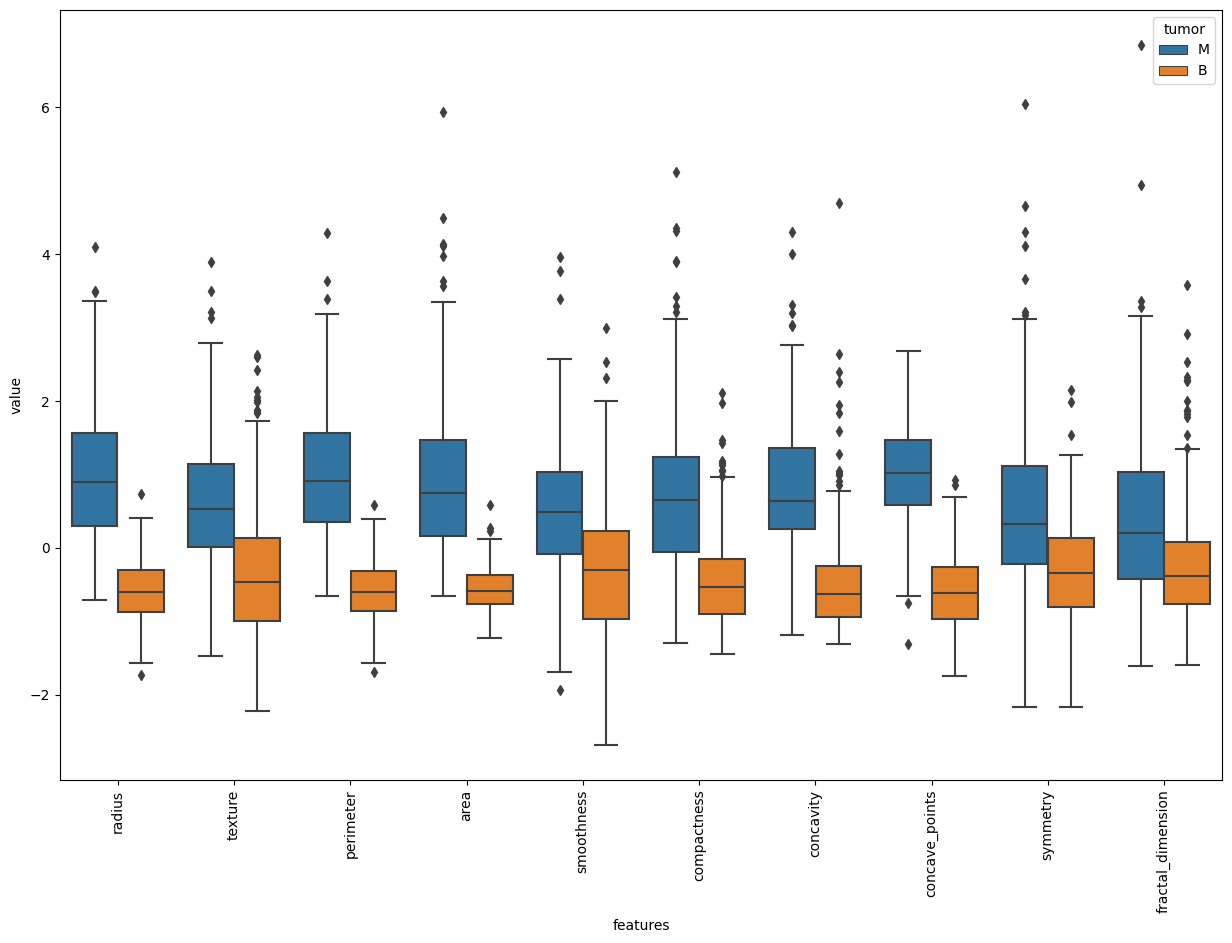

In [13]:
sc = StandardScaler()
df1s = df1.iloc[:,1:]
df1tar = df1['tumor']
df1s = pd.DataFrame(sc.fit_transform(df1s),columns=df1s.columns)
df1con = pd.concat([df1tar,df1s],axis=1)
data = pd.melt(df1con,id_vars='tumor',var_name='features',value_name='value')

plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="tumor", data=data)
plt.xticks(rotation=90)

Again, outliers exist, but nothing extreme. Something to note is how well-defined the differences are between malignant and benign tumors.

#### 3.3 Correlations<a id='3.3'></a>

Next we can visualize the correlations among the features

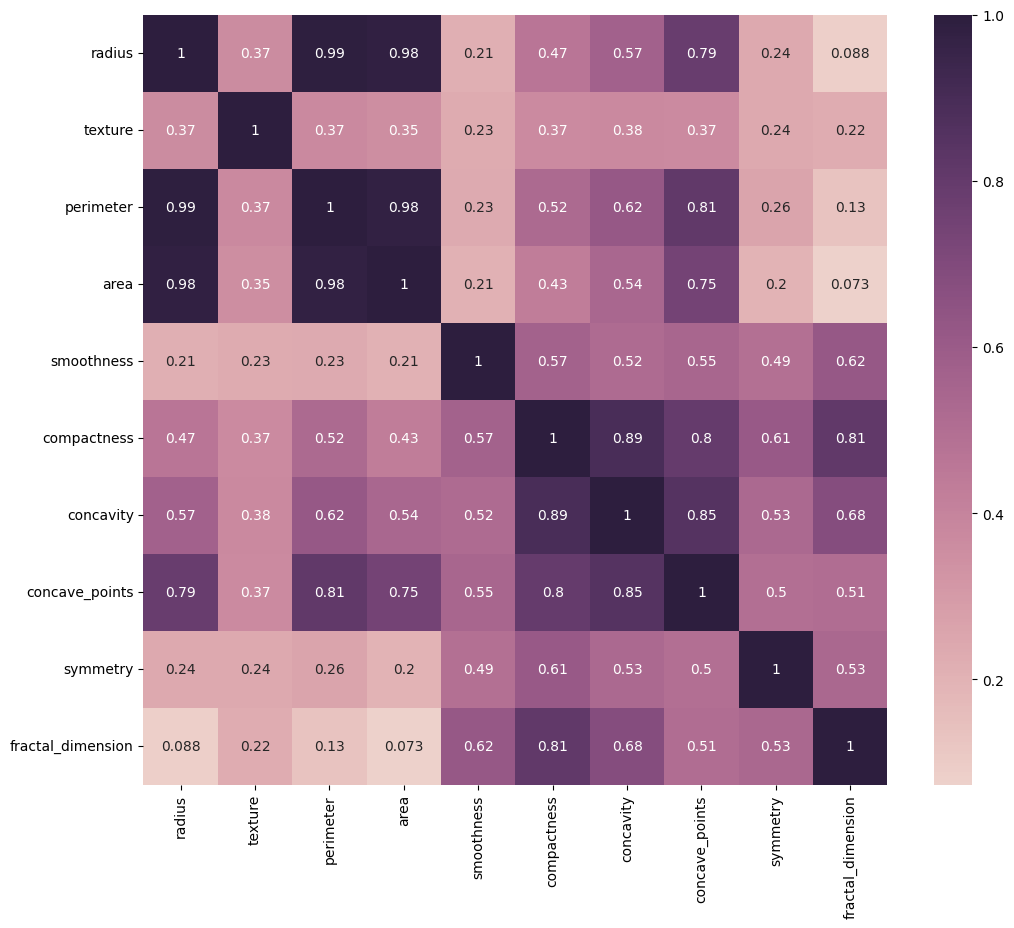

In [14]:
plt.subplots(figsize=(12,10))
sns.heatmap(df1[1:].corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True));

Some of our features are highly correlated, an issue which we can explore possible solutions to later on. One set of potentially problematic features are radius, perimeter, and area. This makes sense because these three are all a measure of size, and therefore would naturally be highly correlated. We may need to reduce these three into just one feature [5].

[5] https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e

Another correlation of interest might be concavity and concave_points (0.85). However, even though they are correlated, they are different measures of one aspect of the breast exam.

Yet another pair to make note of is compactness and concavity (0.89). This correlation may be due to more compact tissue creating a greater level of concavity.

Plotting each feature combination by final tumor type is an illustrative excercise.

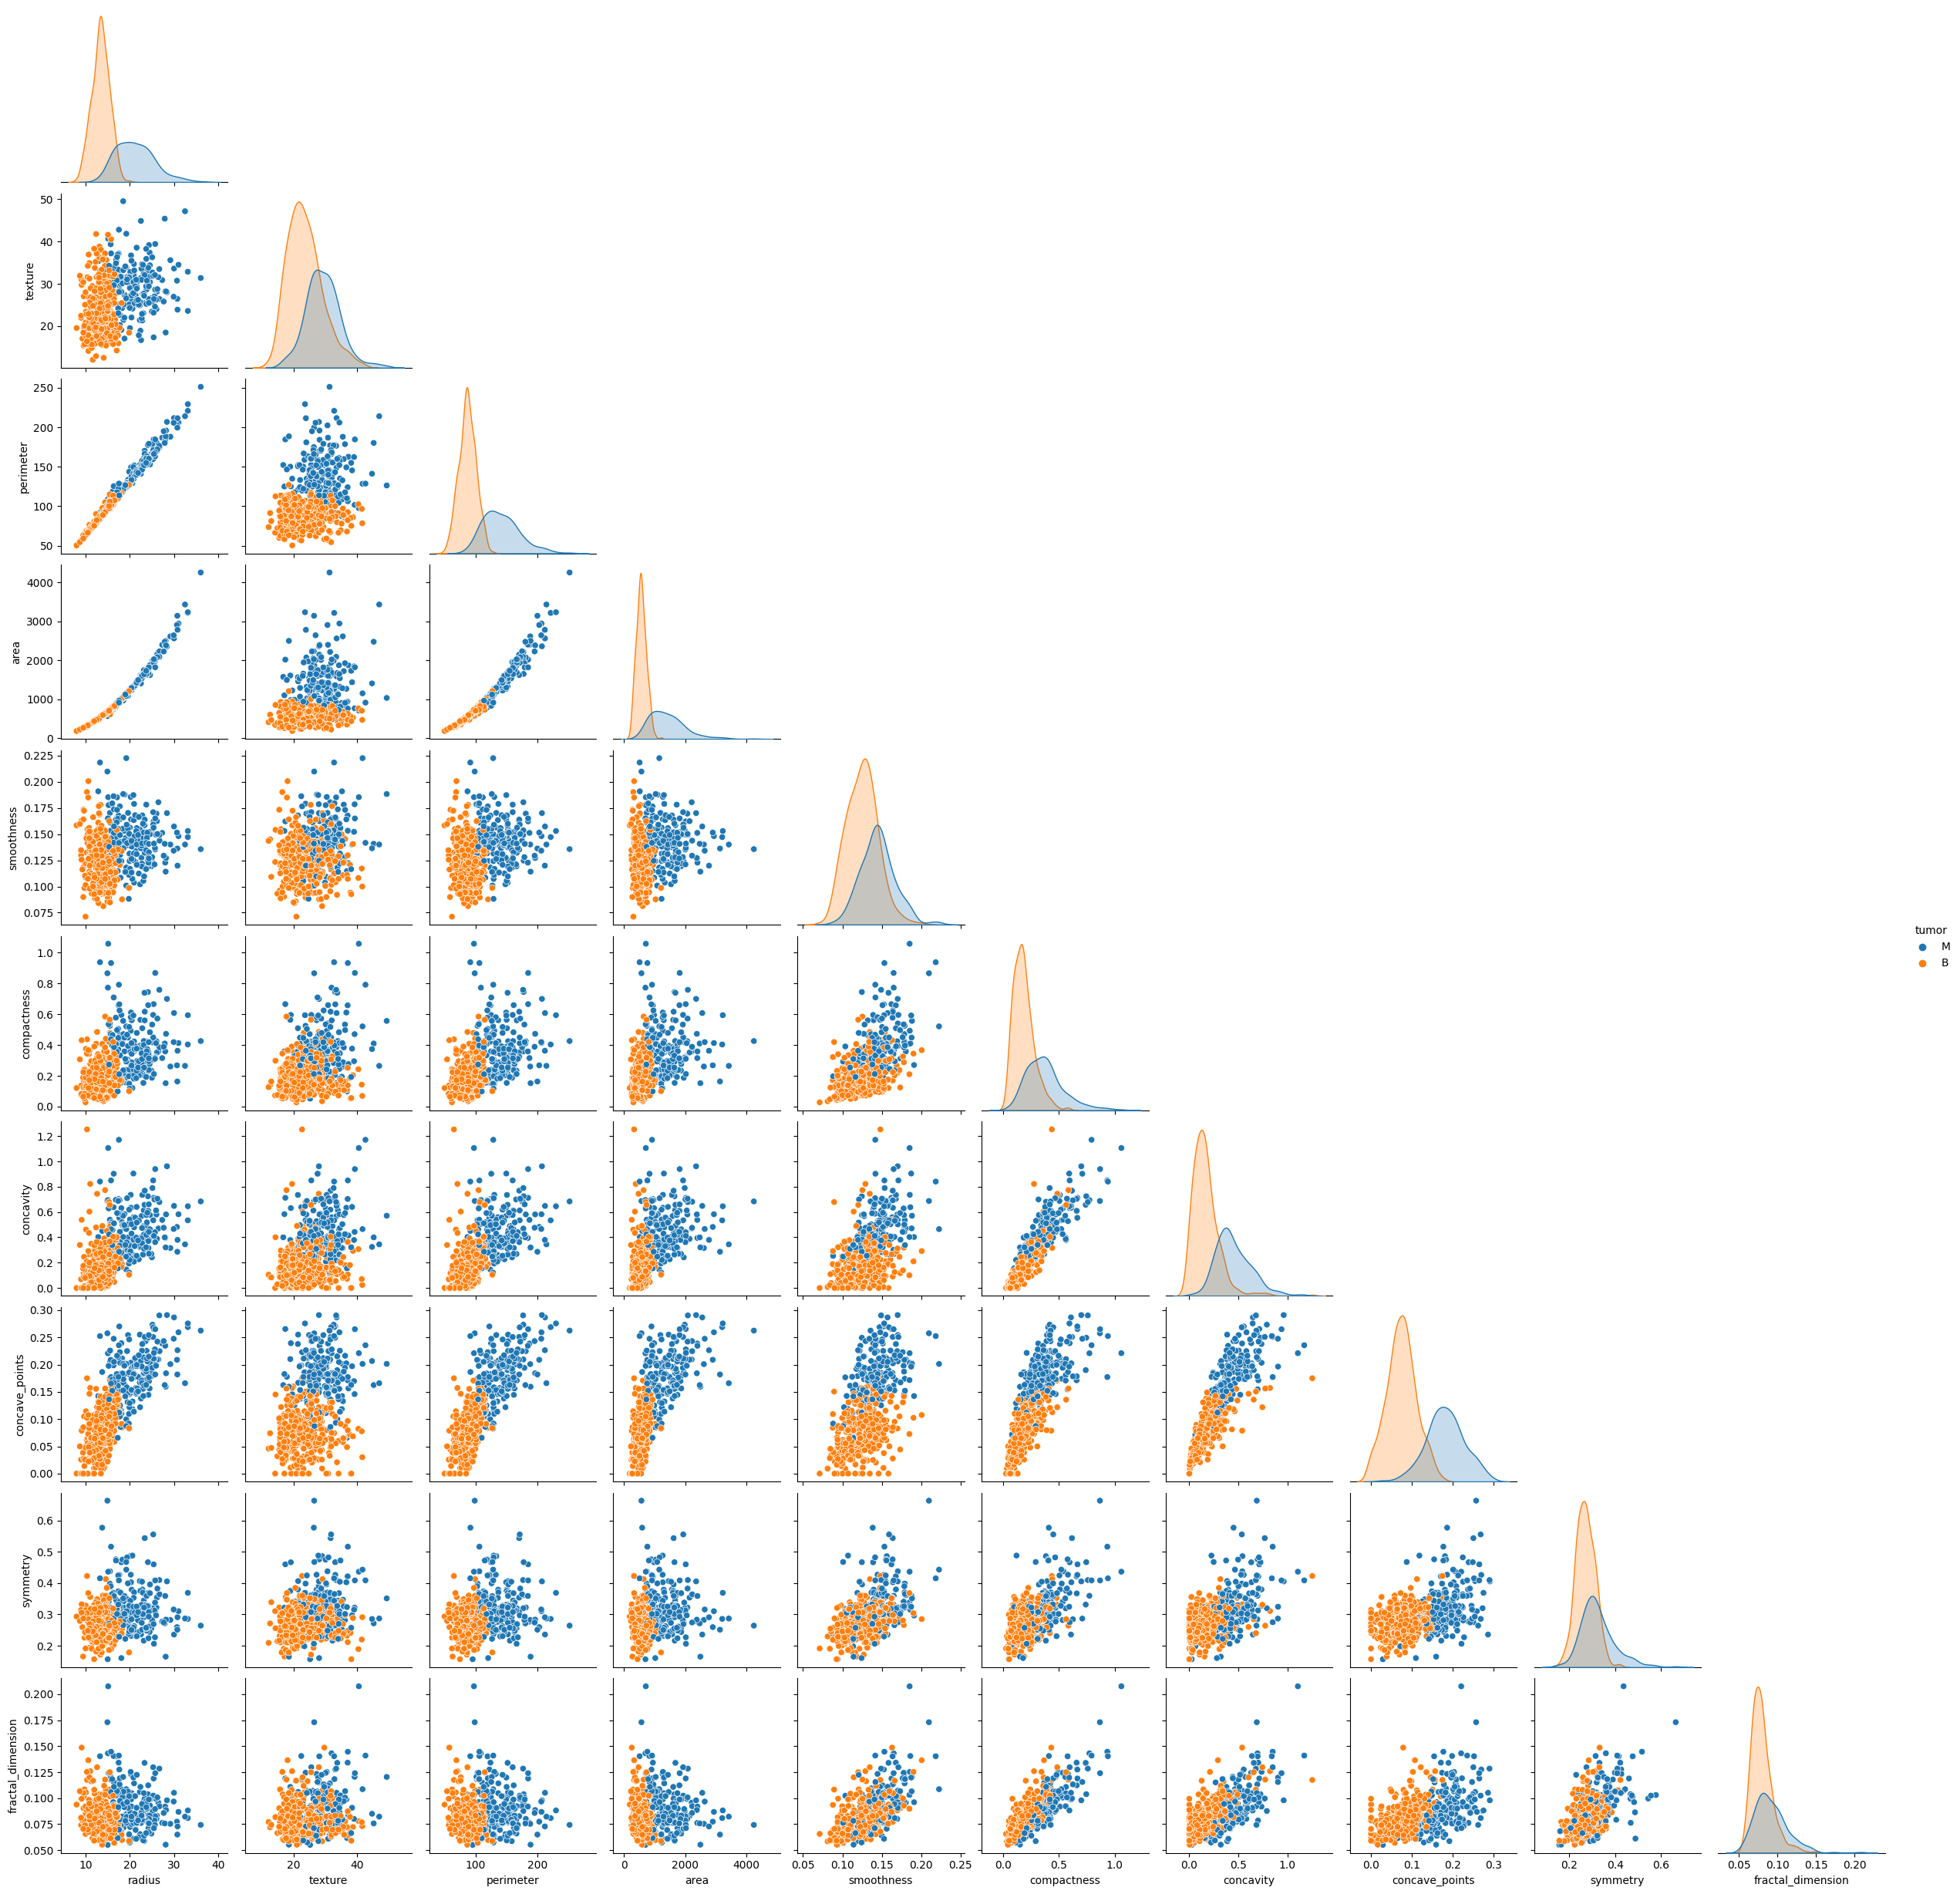

In [15]:
sns.pairplot(df1, hue="tumor" , corner=True)
plt.show()

Looking at each scatterplot of our pairplot, the distribution differences are stark. With such clear a distinction between benign and malignant tumors on nearly all of our metrics, the modeling for this project will likely appear to be "too good to be true."
However, this visualization is evidence to the contrary.

Something else to check before proceeding is the way in which each feature correlates with the target.

By creating dummy variables from the target class (just for use in this exercize) and re-running the correlation martix allows us to visualize these relations.

In [16]:
dfd = pd.get_dummies(df1['tumor'])
df2 = pd.concat([df1 , dfd], axis=1).drop(['tumor'],axis=1)
df2.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,B,M
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


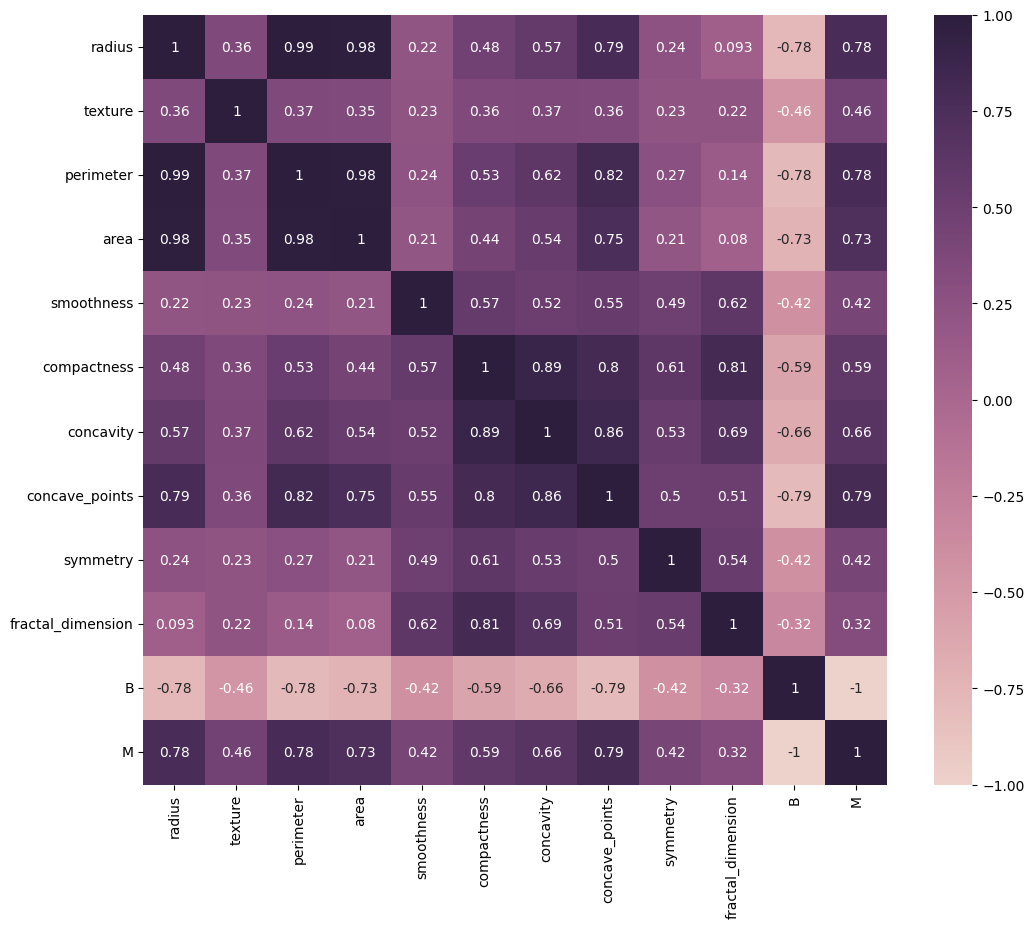

In [17]:
plt.subplots(figsize=(12,10))
sns.heatmap(df2.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True));

There are quite a few moderate correlations between features and targets.

Radius/perimeter/area are again culprits, as well as concave points. All 4 of these features correlate moderately positively with malignancy. Modeling with the data as-is would result in the model weighting these features very heavily, giving them high predictive power.

This could very well be the nature of breast tumors, in that showing certain tendencies on a select few metrics could tip off a keen observer (or a machine learning algorithm) as to a patient's diagnostic status (benign vs. malignant).

#### 3.4 Visualizing the target variable distribution<a id='3.4'></a>

We also want to see how our target class is distributed.

The target is tumor class (B = Benign, M = Malignant)

In [18]:
bm = ['B','M']
bm_label = ['Benign','Malignant']

In [19]:
class_counts = df1['tumor'].value_counts()
class_p = pd.Series([(x / df1.shape[0]) * 100.00 for x in class_counts])

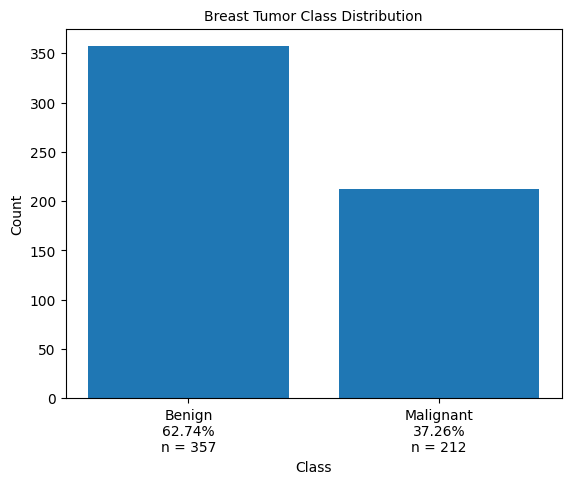

In [20]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0,1])

a=ax.get_xticks().tolist()
for i in a:
        a[i] = bm_label[i]+'\n' + class_p.round(2).astype(str)[i] + '%'+'\n' +'n = '+class_counts.astype(str)[i]
ax.set_xticklabels(a)
ax.set_ylabel('Count')
ax.set_xlabel('Class')
ax.set_title('Breast Tumor Class Distribution',
              fontsize = 10)
plt.show()

We appear to have a slightly imbalanced dataset, but nothing extreme.

#### 3.5 Narrowing the feature variables<a id='3.5'></a>

At this point, we will reduce the features by eliminating redundantcy (based in high correlation)

In [21]:
df2 = df1.drop(columns=["area","perimeter","compactness"])
df2.head()

,tumor,radius,texture,smoothness,concavity,concave_points,symmetry,fractal_dimension
0,M,25.38,17.33,0.1622,0.7119,0.2654,0.4601,0.11890
1,M,24.99,23.41,0.1238,0.2416,0.1860,0.2750,0.08902
2,M,23.57,25.53,0.1444,0.4504,0.2430,0.3613,0.08758
3,M,14.91,26.50,0.2098,0.6869,0.2575,0.6638,0.17300
4,M,22.54,16.67,0.1374,0.4000,0.1625,0.2364,0.07678


Now the data is ready to be used in a model.

### 4.0 Modeling<a id='4.0'></a>

Segregate data into features and target

In [22]:
X = df2.drop(columns = ['tumor'])

In [23]:
y = df2['tumor']

We start the modeling process by splitting the data into a training dataset and a testing dataset.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, stratify = y)

As each feature is measured using different magnitudes, we will scale our data before continuing.

In [25]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

Due to the nature of the problem at hand, we want to minimize false negatives. Having a diagnosis of 'Benign' when your tumor is, in fact, 'Malignant' would be devastating. Therefore, we will utilize the 'recall' performance metric.

We will start with the Logistic Regression algorithm, and use cross-validation to assess the performance of models with different regularization parameters.

In [26]:
lrcv = LogisticRegressionCV(solver = 'lbfgs', penalty = 'l2', 
                            max_iter = 5000, Cs=[0.1,1,10,100], 
                            cv = StratifiedKFold(n_splits=8, shuffle=True),
                           scoring='recall')

In [27]:
lrcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=[0.1, 1, 10, 100],
                     cv=StratifiedKFold(n_splits=8, random_state=None, shuffle=True),
                     max_iter=5000, scoring='recall')

In [28]:
Cs = [0.1, 1, 10, 100]
j = 0

for i in lrcv.scores_['M'].T:
    print("CV score mean for C of ",Cs[j], " = ",i.mean(axis=0))
    j +=1

CV score mean for C of  0.1  =  0.918421052631579
CV score mean for C of  1  =  0.9496710526315789
CV score mean for C of  10  =  0.9624999999999999
CV score mean for C of  100  =  0.9624999999999999


As was expected given the very obvious differences between benign and malignant tumor data, out initial out-of-the-box model performs exceptionally well.

In [29]:
lr = LogisticRegression(solver = 'lbfgs', penalty = 'l2', max_iter = 5000, C=10)

In [30]:
lr.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=5000)

In [31]:
y_pred_tr = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [32]:
print("Classification Report for Training Data")
print(classification_report(y_train, y_pred_tr))

Classification Report for Training Data
              precision    recall  f1-score   support

           B       0.99      0.99      0.99       267
           M       0.98      0.97      0.98       159

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426



As always, training set performance will be exemplary due to the model being trained on that very data.

The important measure is how well the model performs on the test data.

In [33]:
print("Classification Report for Test Data")
print(classification_report(y_test, y_pred))

Classification Report for Test Data
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        90
           M       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



As we expected based on earlier assumptions, the simple Logistic Regression model is extremely accurate in assigning class labels, achieving 96% recall for the positive class "Malignant."

#### 4.1 Hold-out function<a id='4.1'></a>

In order to ensure that one feature is not causing any data leakage, we can repeatedly use a model using all of the features in the data set, except that one feature is excluded at a time. After all of the models are trained, fit, and used to make predictions, we can compare performances.

In [34]:
def one_out(out,X_train, X_test, y_train, y_test):
    """
    'out' is a list of the features in the data set,
    of which one feature is excluded at a time.
    
    LogReg is then looped through.
    
    Must use scaled data.
    """
    
    #code to time how long this code runs for
    start_time = datetime.now()
    
    col = X_train.columns
    cols = col.insert(0, "None")
    
    
    tr_recall = []
    tr_precision = []
    te_recall = []
    te_precision = []
    
    lr = LogisticRegression(solver = 'lbfgs', penalty = 'l2', max_iter = 5000, C=10)
    
    lr.fit(X_train,y_train)
    y_pred_tr = lr.predict(X_train)
    y_pred_te = lr.predict(X_test)
    rstr = recall_score(y_train,y_pred_tr,pos_label='M')
    rste = recall_score(y_test,y_pred_te,pos_label='M')
    pstr = precision_score(y_train,y_pred_tr,pos_label='M')
    pste = precision_score(y_test,y_pred_te,pos_label='M')
    tr_recall.append(rstr)
    tr_precision.append(pstr)
    te_recall.append(rste)
    te_precision.append(pste)
    
    for i in out:
        thisX = X_train.drop(columns=i)
        XT = X_test.drop(columns=i)
        lr.fit(thisX,y_train)
        y_pred_tr = lr.predict(thisX)
        y_pred_te = lr.predict(XT)
        rstr = recall_score(y_train,y_pred_tr,pos_label='M')
        rste = recall_score(y_test,y_pred_te,pos_label='M')
        pstr = precision_score(y_train,y_pred_tr,pos_label='M')
        pste = precision_score(y_test,y_pred_te,pos_label='M')
        tr_recall.append(rstr)
        tr_precision.append(pstr)
        te_recall.append(rste)
        te_precision.append(pste)

    
    fig, ax = plt.subplots(2,1, figsize=(20, 20),sharey=True)
    
    ax[0].plot(cols, tr_recall, 'ro-')
    ax[0].plot(cols, tr_precision, 'go-')
    ax[0].set(xlabel='Feature held out', ylabel='performance', title='Training data')
    ax[0].axhline(y = tr_recall[0], color = 'r', linestyle = ':')
    ax[0].axhline(y = tr_precision[0], color = 'g', linestyle = ':')
    ax[0].legend(['Recall', 'Precision'], loc='lower left')
    
    ax[1].plot(cols, te_recall, 'ro-')
    ax[1].plot(cols, te_precision, 'go-')
    ax[1].set(xlabel='Feature held out', ylabel='performance', title='Testing data')
    ax[1].axhline(y = te_recall[0], color = 'r', linestyle = ':')
    ax[1].axhline(y = te_precision[0], color = 'g', linestyle = ':')
    ax[1].legend(['Recall', 'Precision'], loc='lower left')
    
    fig.subplots_adjust(left=0.1,bottom=0.5,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    plt.show()
    end_time = datetime.now()
    print('Total Duration: {}'.format(end_time - start_time))  

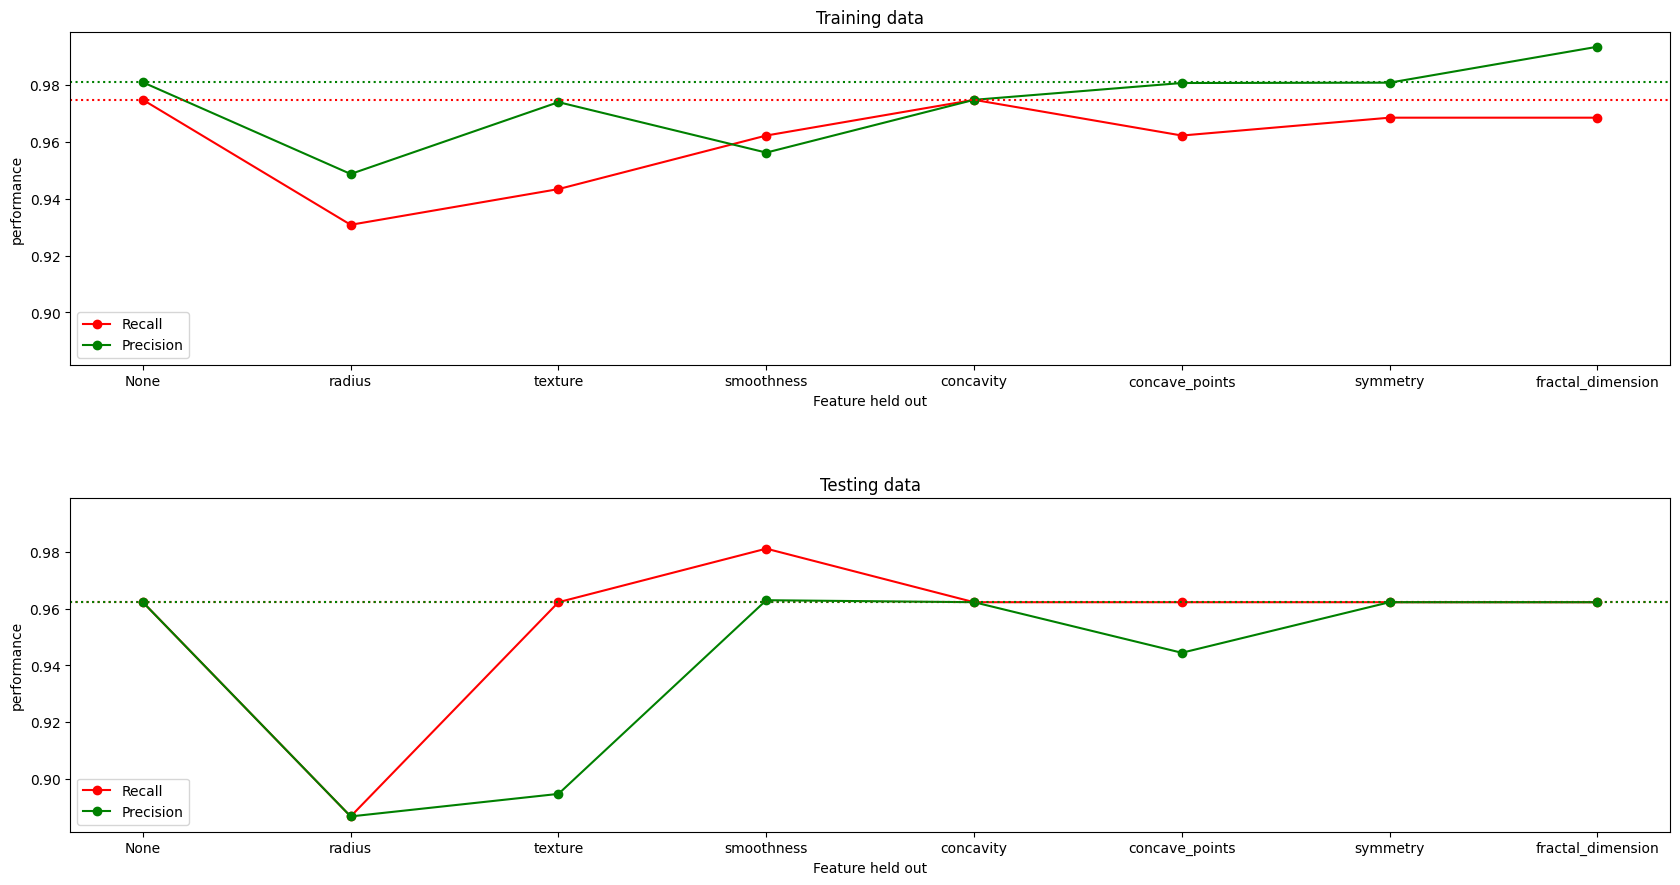

Total Duration: 0:00:00.454603


In [35]:
one_out(X_train.columns,X_train, X_test, y_train, y_test)

There is a large decline in predictive ability when excluding "radius" as a feature, with a decrease in testing recall of <10%.

Given what we know about the data and feature correlations, it is probablistic to surmise that "radius" is the most predictive feature for our model.

#### 4.2 Single-feature prediction comparison<a id='4.2'></a>

One extra step that we can take is to run the same model, but only use the singular feature of "radius."

In [36]:
radius_tr = X_train[['radius']]
radius_te = X_test[['radius']]
lr = LogisticRegression(solver = 'lbfgs', penalty = 'l2', max_iter = 5000, C=10)
lr.fit(radius_tr,y_train)

radius_y_pred_tr = lr.predict(radius_tr)
radius_y_pred_te = lr.predict(radius_te)

In [37]:
print("Classification Report for Training Data")
print(classification_report(y_train, radius_y_pred_tr))

Classification Report for Training Data
              precision    recall  f1-score   support

           B       0.90      0.96      0.93       267
           M       0.92      0.82      0.87       159

    accuracy                           0.91       426
   macro avg       0.91      0.89      0.90       426
weighted avg       0.91      0.91      0.90       426



In [38]:
print("Classification Report for Test Data")
print(classification_report(y_test, radius_y_pred_te))

Classification Report for Test Data
              precision    recall  f1-score   support

           B       0.97      0.94      0.96        90
           M       0.91      0.94      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



Having run our base model with only the "very predictive" feature of "radius", we can see that it does perform well on its own. However, the predictive power of "radius" is not close to 100% recall, and the combination of features still outperforms the single feature. Therefore, we can rule out this feature somehow being a leak of information.

Now we can use hyperparameter tuning to find the best combination of parameters for our data.

#### 4.3 Hyperparameter tuning<a id='4.3'></a>

##### 4.3.1 Logistic Regression<a id='4.3.1'></a>

First we will explote parameter combinations and their performance for Logistic Regression.

In [39]:
def LR_recall(X,y,Cval=[0.001, 0.1, 0.5, 1, 5, 10, 20, 50, 100]):
    """
    X is X_train
    y is y_train
    Cval is a list of C regularizations to be tried, auto covers a wide range
    suppressCR is whether you want the final readout to display the classification reports,
        False means do display report, don't suppress it (default)
        True means don't display report, suppress it
    
    Logistic regression only, max_iter = 8000
    """
    scoring = make_scorer(recall_score,pos_label='M')
    #code to time how long this code runs for
    start_timeLR = datetime.now()
    
    # create a pipeline for scaled data in logistic regression
    steps = [("lr",LogisticRegression(max_iter = 8000))]
    pipe = Pipeline(steps)
    
    # list parameters to be tried in our grid search.
    # all solvers at every penalty level included.
    # Cval is implemented here (defult is wide range of C values).
    params = [{"lr__penalty":['none'], 'lr__solver': ['newton-cg','sag','lbfgs','saga']},
              {"lr__penalty":['l1'],"lr__solver":['liblinear','saga'],"lr__C":Cval},
              {"lr__penalty":['l2'], 'lr__solver': ['liblinear','newton-cg','sag','lbfgs','saga'],"lr__C":Cval},
              {"lr__penalty":['elasticnet'],'lr__solver': ['saga'],'lr__l1_ratio':[0.2,0.5,0.8],"lr__C":Cval}
             ]
    
    # execute the grid search
    grid = GridSearchCV(pipe, param_grid=params, scoring=scoring, cv=StratifiedKFold(5))
    # fit the model
    grid.fit(X, y)
    # compile results in a dataframe
    results = pd.DataFrame(grid.cv_results_)
    # filter to only the desired columns and sort by performance
    filtered = results.iloc[:,[5,4,7,6,14]].sort_values(results.columns[14], ascending=False)
    filtered
    
    best_model = filtered.head(1)
    end_timeLR = datetime.now()
    print('Duration: {}'.format(end_timeLR - start_timeLR))  
    
    return filtered
#best_model

In [40]:
LR_recall(X_train,y_train)

Duration: 0:00:04.565013


,param_lr__solver,param_lr__penalty,param_lr__l1_ratio,param_lr__C,mean_test_score
42,liblinear,l2,NaN,5,0.974597
43,newton-cg,l2,NaN,5,0.974597
44,sag,l2,NaN,5,0.974597
45,lbfgs,l2,NaN,5,0.974597
46,saga,l2,NaN,5,0.974597
...,...,...,...,...,...
69,saga,elasticnet,0.8,0.001,0.000000
67,saga,elasticnet,0.2,0.001,0.000000
5,saga,l1,NaN,0.001,0.000000
4,liblinear,l1,NaN,0.001,0.000000


The results show that many different solvers with different combinations of parameters arrive at similar conclusions: ~97% recall. The top performer was liblinear with l2 penalty and 5 C regularization, producing a positive class recall score of 0.9746.

##### 4.3.2 Random Forest<a id='4.3.2'></a>

In [41]:
def RF_recall(X,y):
    """
    X is X_train
    y is y_train
    
    """
    #code to time how long this code runs for
    start_timeLR = datetime.now()
    
    # create a pipeline for scaled data in logistic regression
    steps = [("rf",RandomForestClassifier())]
    pipe = Pipeline(steps)
    md = [3,4,5,6,7,8,9,10,11,12,13,14]
    # list parameters to be tried in our grid search.
    # all solvers at every penalty level included.
    # Cval is implemented here (defult is wide range of C values).
    params = [{"rf__max_depth":md,"rf__max_features":['sqrt','log2', None],
              "rf__criterion":['gini', 'entropy','log_loss']}]
    
    scoring = make_scorer(recall_score,pos_label='M')

    # execute the grid search
    grid = GridSearchCV(pipe, param_grid=params, scoring=scoring)
    # fit the model
    grid.fit(X, y)
    # compile results in a dataframe
    results = pd.DataFrame(grid.cv_results_)
    # filter to only the desired columns and sort by performance
    filtered = results.iloc[:,[4,5,6,13]].sort_values(results.columns[13], ascending=False)
    filtered
    
    best_model = filtered.head(1)
    end_timeLR = datetime.now()
    print('Duration: {}'.format(end_timeLR - start_timeLR))  
    
    return filtered

In [42]:
RF_recall(X_train,y_train)

Duration: 0:01:47.348591


,param_rf__criterion,param_rf__max_depth,param_rf__max_features,mean_test_score
15,gini,8,sqrt,0.949395
93,log_loss,10,sqrt,0.949395
94,log_loss,10,log2,0.943145
58,entropy,10,log2,0.943145
18,gini,9,sqrt,0.943145
...,...,...,...,...
40,entropy,4,log2,0.911694
41,entropy,4,None,0.911694
62,entropy,11,None,0.911694
76,log_loss,4,log2,0.911694


The best Random Forest result gives us a positive class recall score of 0.949.

After creating functions for the purpose of hyperparameter tuning for both Random Forest and Logistic Regression algorithms, the winning combination appears to be Logistic Regression by a small margain.

#### 4.4 Testing the model<a id='4.4'></a>

In [62]:
lr_best = LogisticRegression(solver = 'liblinear', penalty = 'l2', max_iter = 5000, C=5)

In [63]:
lr_best.fit(X_train,y_train)

LogisticRegression(C=5, max_iter=5000, solver='liblinear')

In [64]:
lr_best_pred = lr_best.predict(X_test)

In [65]:
print("Classification Report for Test Data")
print(classification_report(y_test, lr_best_pred))

Classification Report for Test Data
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        90
           M       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



This tuned result is identical to the preliminary Logistic regression model.

For posterity, we can also run the best performing Random Forest model.

In [47]:
rfc = RandomForestClassifier(criterion='entropy',max_depth=7,max_features='log2')

In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2')

In [49]:
rf_pred = rfc.predict(X_test)

In [50]:
print("Classification Report for Test Data")
print(classification_report(y_test, rf_pred))

Classification Report for Test Data
              precision    recall  f1-score   support

           B       0.98      0.94      0.96        90
           M       0.91      0.96      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



Performance is very good, but not quite as good as the Logistic Regression. Recall score is identical for positive class, but the positive class precision and negative class recall are slightly worse in Random Forest.

#### 4.5 Visualizing model predictions<a id='4.5'></a>

One final step that I find insightful is to plot how well the model performed by seperating datapoints into true positive, true negative, false positive, and false negative. The resulting visualizations can show where the erroneously identified data lie in relation to correctly identified data.

In [51]:
final = pd.concat([X_test.reset_index(), y_test.reset_index(), pd.DataFrame(rf_pred,columns=['predicted'])], axis=1).drop(columns=["index"])
final

,radius,texture,smoothness,concavity,concave_points,symmetry,fractal_dimension,tumor,predicted
0,-0.159076,0.013487,-0.531231,1.974448,0.356930,-0.079055,2.238679,B,B
1,-0.618644,1.213782,3.699982,2.903353,2.147355,2.016180,3.068829,M,M
2,-0.564331,-0.383331,-1.232846,-1.296450,-1.590414,-0.623272,-1.027477,B,B
3,0.960598,0.387350,2.361317,3.221374,1.288197,0.561200,1.963759,M,M
4,0.862418,1.197384,0.290907,-0.100744,1.099489,-0.933795,0.466793,M,M
...,...,...,...,...,...,...,...,...,...
138,0.626367,2.694472,3.880766,1.013338,1.363373,2.461157,1.360013,M,M
139,0.020573,0.487374,-1.013323,0.577065,-0.253072,-0.677693,-0.471169,B,B
140,-0.658334,1.787693,0.553475,-0.413231,-0.390538,0.125827,-0.319154,B,B
141,-0.616555,0.275847,0.346864,0.087452,0.020938,0.804497,0.015062,B,B


Adding predicted categorization labels to the data:

In [52]:
final["result"] = np.where((final["tumor"]=="M") & (final['tumor']!=final["predicted"]),"FN",
                           np.where((final["tumor"]=="M") & (final['tumor']==final["predicted"]),"TP",
                                    np.where((final["tumor"]=="B") & (final['tumor']!=final["predicted"]),"FP",
                                             np.where((final["tumor"]=="B") & (final['tumor']==final["predicted"]),"TN",""))))

final

,radius,texture,smoothness,concavity,concave_points,symmetry,fractal_dimension,tumor,predicted,result
0,-0.159076,0.013487,-0.531231,1.974448,0.356930,-0.079055,2.238679,B,B,TN
1,-0.618644,1.213782,3.699982,2.903353,2.147355,2.016180,3.068829,M,M,TP
2,-0.564331,-0.383331,-1.232846,-1.296450,-1.590414,-0.623272,-1.027477,B,B,TN
3,0.960598,0.387350,2.361317,3.221374,1.288197,0.561200,1.963759,M,M,TP
4,0.862418,1.197384,0.290907,-0.100744,1.099489,-0.933795,0.466793,M,M,TP
...,...,...,...,...,...,...,...,...,...,...
138,0.626367,2.694472,3.880766,1.013338,1.363373,2.461157,1.360013,M,M,TP
139,0.020573,0.487374,-1.013323,0.577065,-0.253072,-0.677693,-0.471169,B,B,TN
140,-0.658334,1.787693,0.553475,-0.413231,-0.390538,0.125827,-0.319154,B,B,TN
141,-0.616555,0.275847,0.346864,0.087452,0.020938,0.804497,0.015062,B,B,TN


In [53]:
final['result'].value_counts()

TN    85
TP    51
FP     5
FN     2
Name: result, dtype: int64

In [54]:
finalP = final.iloc[:,[0,1,2,3,4,5,-1]]
finalP

,radius,texture,smoothness,concavity,concave_points,symmetry,result
0,-0.159076,0.013487,-0.531231,1.974448,0.356930,-0.079055,TN
1,-0.618644,1.213782,3.699982,2.903353,2.147355,2.016180,TP
2,-0.564331,-0.383331,-1.232846,-1.296450,-1.590414,-0.623272,TN
3,0.960598,0.387350,2.361317,3.221374,1.288197,0.561200,TP
4,0.862418,1.197384,0.290907,-0.100744,1.099489,-0.933795,TP
...,...,...,...,...,...,...,...
138,0.626367,2.694472,3.880766,1.013338,1.363373,2.461157,TP
139,0.020573,0.487374,-1.013323,0.577065,-0.253072,-0.677693,TN
140,-0.658334,1.787693,0.553475,-0.413231,-0.390538,0.125827,TN
141,-0.616555,0.275847,0.346864,0.087452,0.020938,0.804497,TN


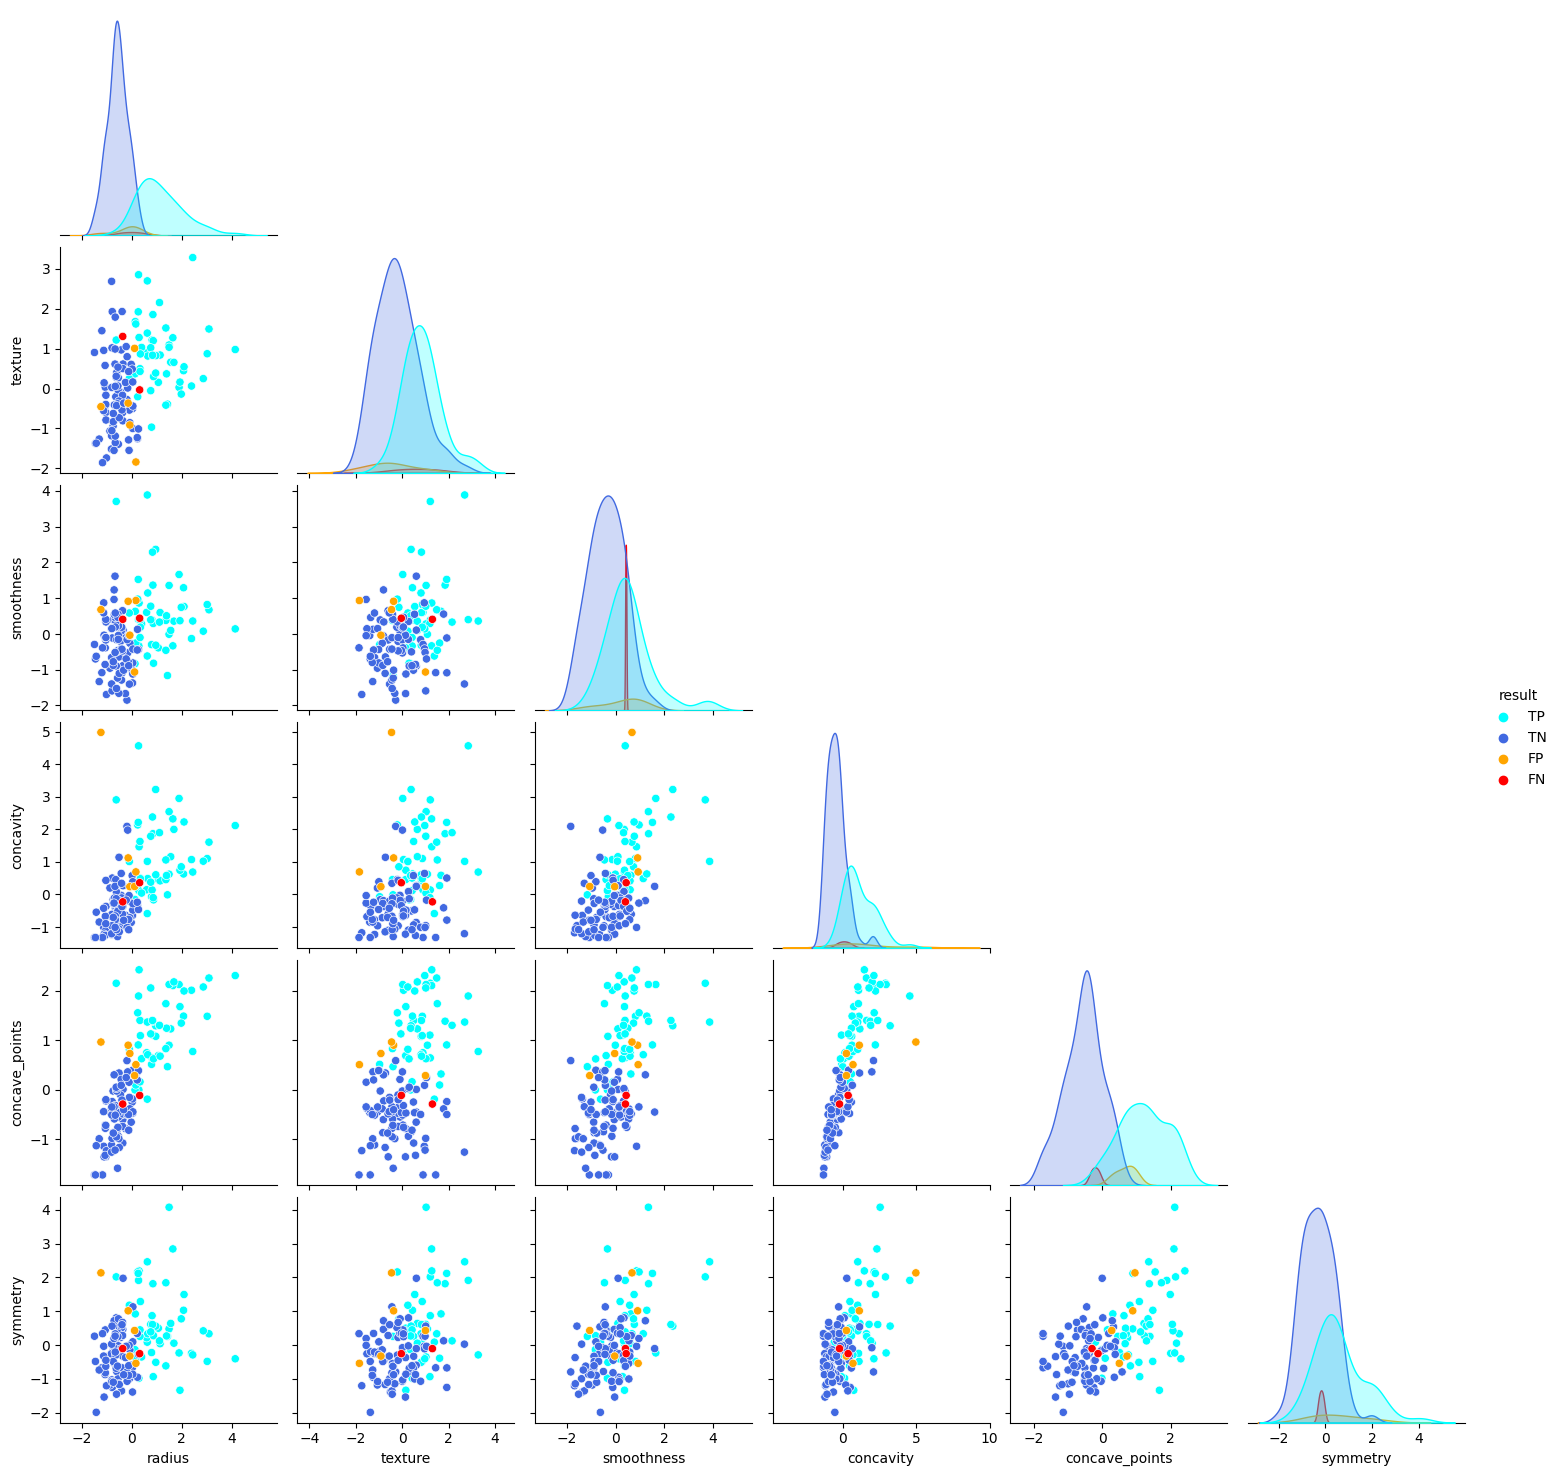

In [55]:
sns.pairplot(finalP.sort_values('result',ascending=False), hue="result",palette =['cyan','royalblue', 'orange', 'red'] , corner=True)
plt.show()

This visualization can be read as:
1. Red points are malignant tumors identified as benign (False Negative).
2. Red points, if correctly identified as malignant, would have been light blue (True Positive).
3. Orange points are benign tumors identified as malignant (False Positive)
4. Orange points, if correctly identified as benign, would have been dark blue (True Negative).


An observer can see in most of these subplots that the red/orange markers are either grouped closer to the respective light/dark blue markers, or they are nearto the borderline seperating light blue and dark blue.

Threrfore, it is understandable how a model would make these errors.

#### 4.6 Convolutional neural network <a id='4.6'></a>

One last algorithm that should be tested is a type of deep learning called artificial neural networks; specifically the convolutional class (CNN). 

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping,ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from keras.metrics import Recall
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

While CNNs can be used in a wide variety of applications, including regression and multiclass classification, we can use it to great effect in binary classification. First we must turn our string categories into numeric categories:

In [57]:
y_train_nn = y_train.replace("M",1).replace("B",0)

y_test_nn = y_test.replace("M",1).replace("B",0)

In [58]:
X_train.shape

(426, 7)

Now that we have a clear idea of the shape of the training data, having 7 columns and 426 rows, we can build the neural network framework for our model. We will use 2 hidden layers, and end on a terminal layer with sigmoid activation. The result will be a number between 0 and 1, where any output lower than 0.5 is considered class 0, and any output 0.5 and higher is class 0. 

In [59]:
keras.backend.clear_session()    

# build the model
model = Sequential()
model.add(Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu')) # (features,)
model.add(Dropout(0.1))
model.add(Dense(3, activation='relu')) # (features,)
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid')) # output node
model.summary() # see what the model looks like

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense_1 (Dense)             (None, 5)                 40        
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dropout_2 (Dropout)         (None, 3)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 4

The model is built and ready, like a skeleton in need of muscles and organs. The next step in the process is supplying these things to our model, as we fit the it with our training data. We will use 180 epochs and a batch size of 20.

In [60]:
history = model.fit(X_train, y_train_nn,
                    validation_data = (X_test, y_test_nn),
                    epochs=180,
                    batch_size=20,
                    verbose=1)

Epoch 1/180
22/22 [==============================] - 1s 15ms/step - loss: 0.6873 - recall: 0.4465 - val_loss: 0.6739 - val_recall: 0.6226
Epoch 2/180
22/22 [==============================] - 0s 4ms/step - loss: 0.6699 - recall: 0.4780 - val_loss: 0.6610 - val_recall: 0.6415
Epoch 3/180
22/22 [==============================] - 0s 4ms/step - loss: 0.6606 - recall: 0.4969 - val_loss: 0.6489 - val_recall: 0.7170
Epoch 4/180
22/22 [==============================] - 0s 5ms/step - loss: 0.6487 - recall: 0.5220 - val_loss: 0.6359 - val_recall: 0.7547
Epoch 5/180
22/22 [==============================] - 0s 4ms/step - loss: 0.6378 - recall: 0.5597 - val_loss: 0.6195 - val_recall: 0.7925
Epoch 6/180
22/22 [==============================] - 0s 4ms/step - loss: 0.6219 - recall: 0.5283 - val_loss: 0.5986 - val_recall: 0.8113
Epoch 7/180
22/22 [==============================] - 0s 5ms/step - loss: 0.5970 - recall: 0.5975 - val_loss: 0.5748 - val_recall: 0.8113
Epoch 8/180
22/22 [=====================

22/22 [==============================] - 0s 3ms/step - loss: 0.1881 - recall: 0.8491 - val_loss: 0.1378 - val_recall: 0.9434
Epoch 61/180
22/22 [==============================] - 0s 3ms/step - loss: 0.1600 - recall: 0.8805 - val_loss: 0.1384 - val_recall: 0.9434
Epoch 62/180
22/22 [==============================] - 0s 4ms/step - loss: 0.1666 - recall: 0.8491 - val_loss: 0.1386 - val_recall: 0.9434
Epoch 63/180
22/22 [==============================] - 0s 3ms/step - loss: 0.1694 - recall: 0.8365 - val_loss: 0.1382 - val_recall: 0.9434
Epoch 64/180
22/22 [==============================] - 0s 3ms/step - loss: 0.1674 - recall: 0.8553 - val_loss: 0.1319 - val_recall: 0.9434
Epoch 65/180
22/22 [==============================] - 0s 3ms/step - loss: 0.1610 - recall: 0.8365 - val_loss: 0.1254 - val_recall: 0.9623
Epoch 66/180
22/22 [==============================] - 0s 4ms/step - loss: 0.1716 - recall: 0.8176 - val_loss: 0.1232 - val_recall: 0.9623
Epoch 67/180
22/22 [===========================

22/22 [==============================] - 0s 5ms/step - loss: 0.1364 - recall: 0.8553 - val_loss: 0.0926 - val_recall: 0.9811
Epoch 120/180
22/22 [==============================] - 0s 4ms/step - loss: 0.1452 - recall: 0.8302 - val_loss: 0.0910 - val_recall: 0.9811
Epoch 121/180
22/22 [==============================] - 0s 4ms/step - loss: 0.1467 - recall: 0.8491 - val_loss: 0.0893 - val_recall: 0.9811
Epoch 122/180
22/22 [==============================] - 0s 4ms/step - loss: 0.1281 - recall: 0.8616 - val_loss: 0.0903 - val_recall: 0.9811
Epoch 123/180
22/22 [==============================] - 0s 4ms/step - loss: 0.1493 - recall: 0.8239 - val_loss: 0.0931 - val_recall: 0.9811
Epoch 124/180
22/22 [==============================] - 0s 4ms/step - loss: 0.1214 - recall: 0.8994 - val_loss: 0.0917 - val_recall: 0.9811
Epoch 125/180
22/22 [==============================] - 0s 4ms/step - loss: 0.1377 - recall: 0.8679 - val_loss: 0.0910 - val_recall: 0.9811
Epoch 126/180
22/22 [====================

22/22 [==============================] - 0s 4ms/step - loss: 0.1310 - recall: 0.8553 - val_loss: 0.0937 - val_recall: 0.9811
Epoch 179/180
22/22 [==============================] - 0s 4ms/step - loss: 0.1379 - recall: 0.8616 - val_loss: 0.0925 - val_recall: 0.9811
Epoch 180/180
22/22 [==============================] - 0s 3ms/step - loss: 0.1491 - recall: 0.8365 - val_loss: 0.0889 - val_recall: 0.9811


In [61]:
y_pred_nn = model.predict(X_test)

yt = pd.DataFrame(y_test_nn,columns=['tumor'])
yt['pred'] = 0

for e,i in enumerate(y_pred_nn):
    yt.iloc[e,1] = y_pred_nn[e][0]

yt['pred_bi'] = np.where(yt['pred']<.5,0,1)
yt['accurate'] = np.where(yt['pred_bi']==yt['tumor'],1,0)


print("Recall = {}".format(np.mean(yt['accurate'])))

5/5 [==============================] - 0s 2ms/step
Recall = 0.9790209790209791


Calling predict on the test data reveals the result, a very good recall of 0.979. This result also improves upon the results from our best-performing Logistic Regression and Random Forest models, even if only slightly.

### 5.0 Conclusions<a id='5.0'></a>

Given a breast tumor diagnosis dataset with such clearly delineated data, we came to anticipate very good modeling results.

As expected, the best models for three algorithm types (Logistic Regression, Random Forest, and Neural Networks) each performed exceptionally well on the test dataset, scoring above 0.95 on positive class recall.

After inspecting the data, feature correlations, and results, I have a high degree of confidence that any of these models would be an excellent diagnostic tool for malignant breast tumor identification.